# 

title: Vegetation Data Access

subtitle: Accessing NDVI data on Tribal Subdivisions

description: \|

For the vegetation health coding challenge, you used some sample data
that we packaged up for you. In this lesson, we’’ll go through how we
got that data. Give it a try, and then modify it to answer your own
scientific question!

params:

id: stars

site_name: Gila River Indian Community

data_dir: gila-river

download_key: gila-river-ndvi

project_title: Gila River Vegetation

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 1: Study area

You can use any boundary for your study. In the example, we used the
“American Indian Tribal Subdivisions” available from the US Census.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-info"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Nothing about us without us</div></div><div class="callout-body-container callout-body"><p>We realize not everyone is cool with the term “American Indian”,
especially when used by people who aren’t Tribal members. At the same
time, others feel that it is important to reclaim “Indian”, and more
importantly that’s the term a lot of Tribal people use every day. In
this case, we’re stuck because of how this dataset is named in the
Census boundary datasets…however, when sharing your work or publishing
your own data, it’s important to include local communities in the area
you are studying, about language choices but also <em>throughout</em>
your project.</p></div></div>

We’ll be downloading the boundaries using a web browser. The data
source, [data.gov](https://catalog.data.gov/), has placed restrictions
on programmatic downloads (downloads using code). There are a number of
ways to attempt to get around these restrictions, such as pretending to
be a web browser by setting the **User Agent** parameter, but in this
case we’ve found it’s just not worth the time and effort. Follow the
steps below to download the data and put it somewhere that your Python
code can find it.

## STEP 1A: Open up the data catalog

Click this link: [https://catalog.data.gov](https://catalog.data.gov/).
You can also open your web browser and type it in if you prefer.

<figure>
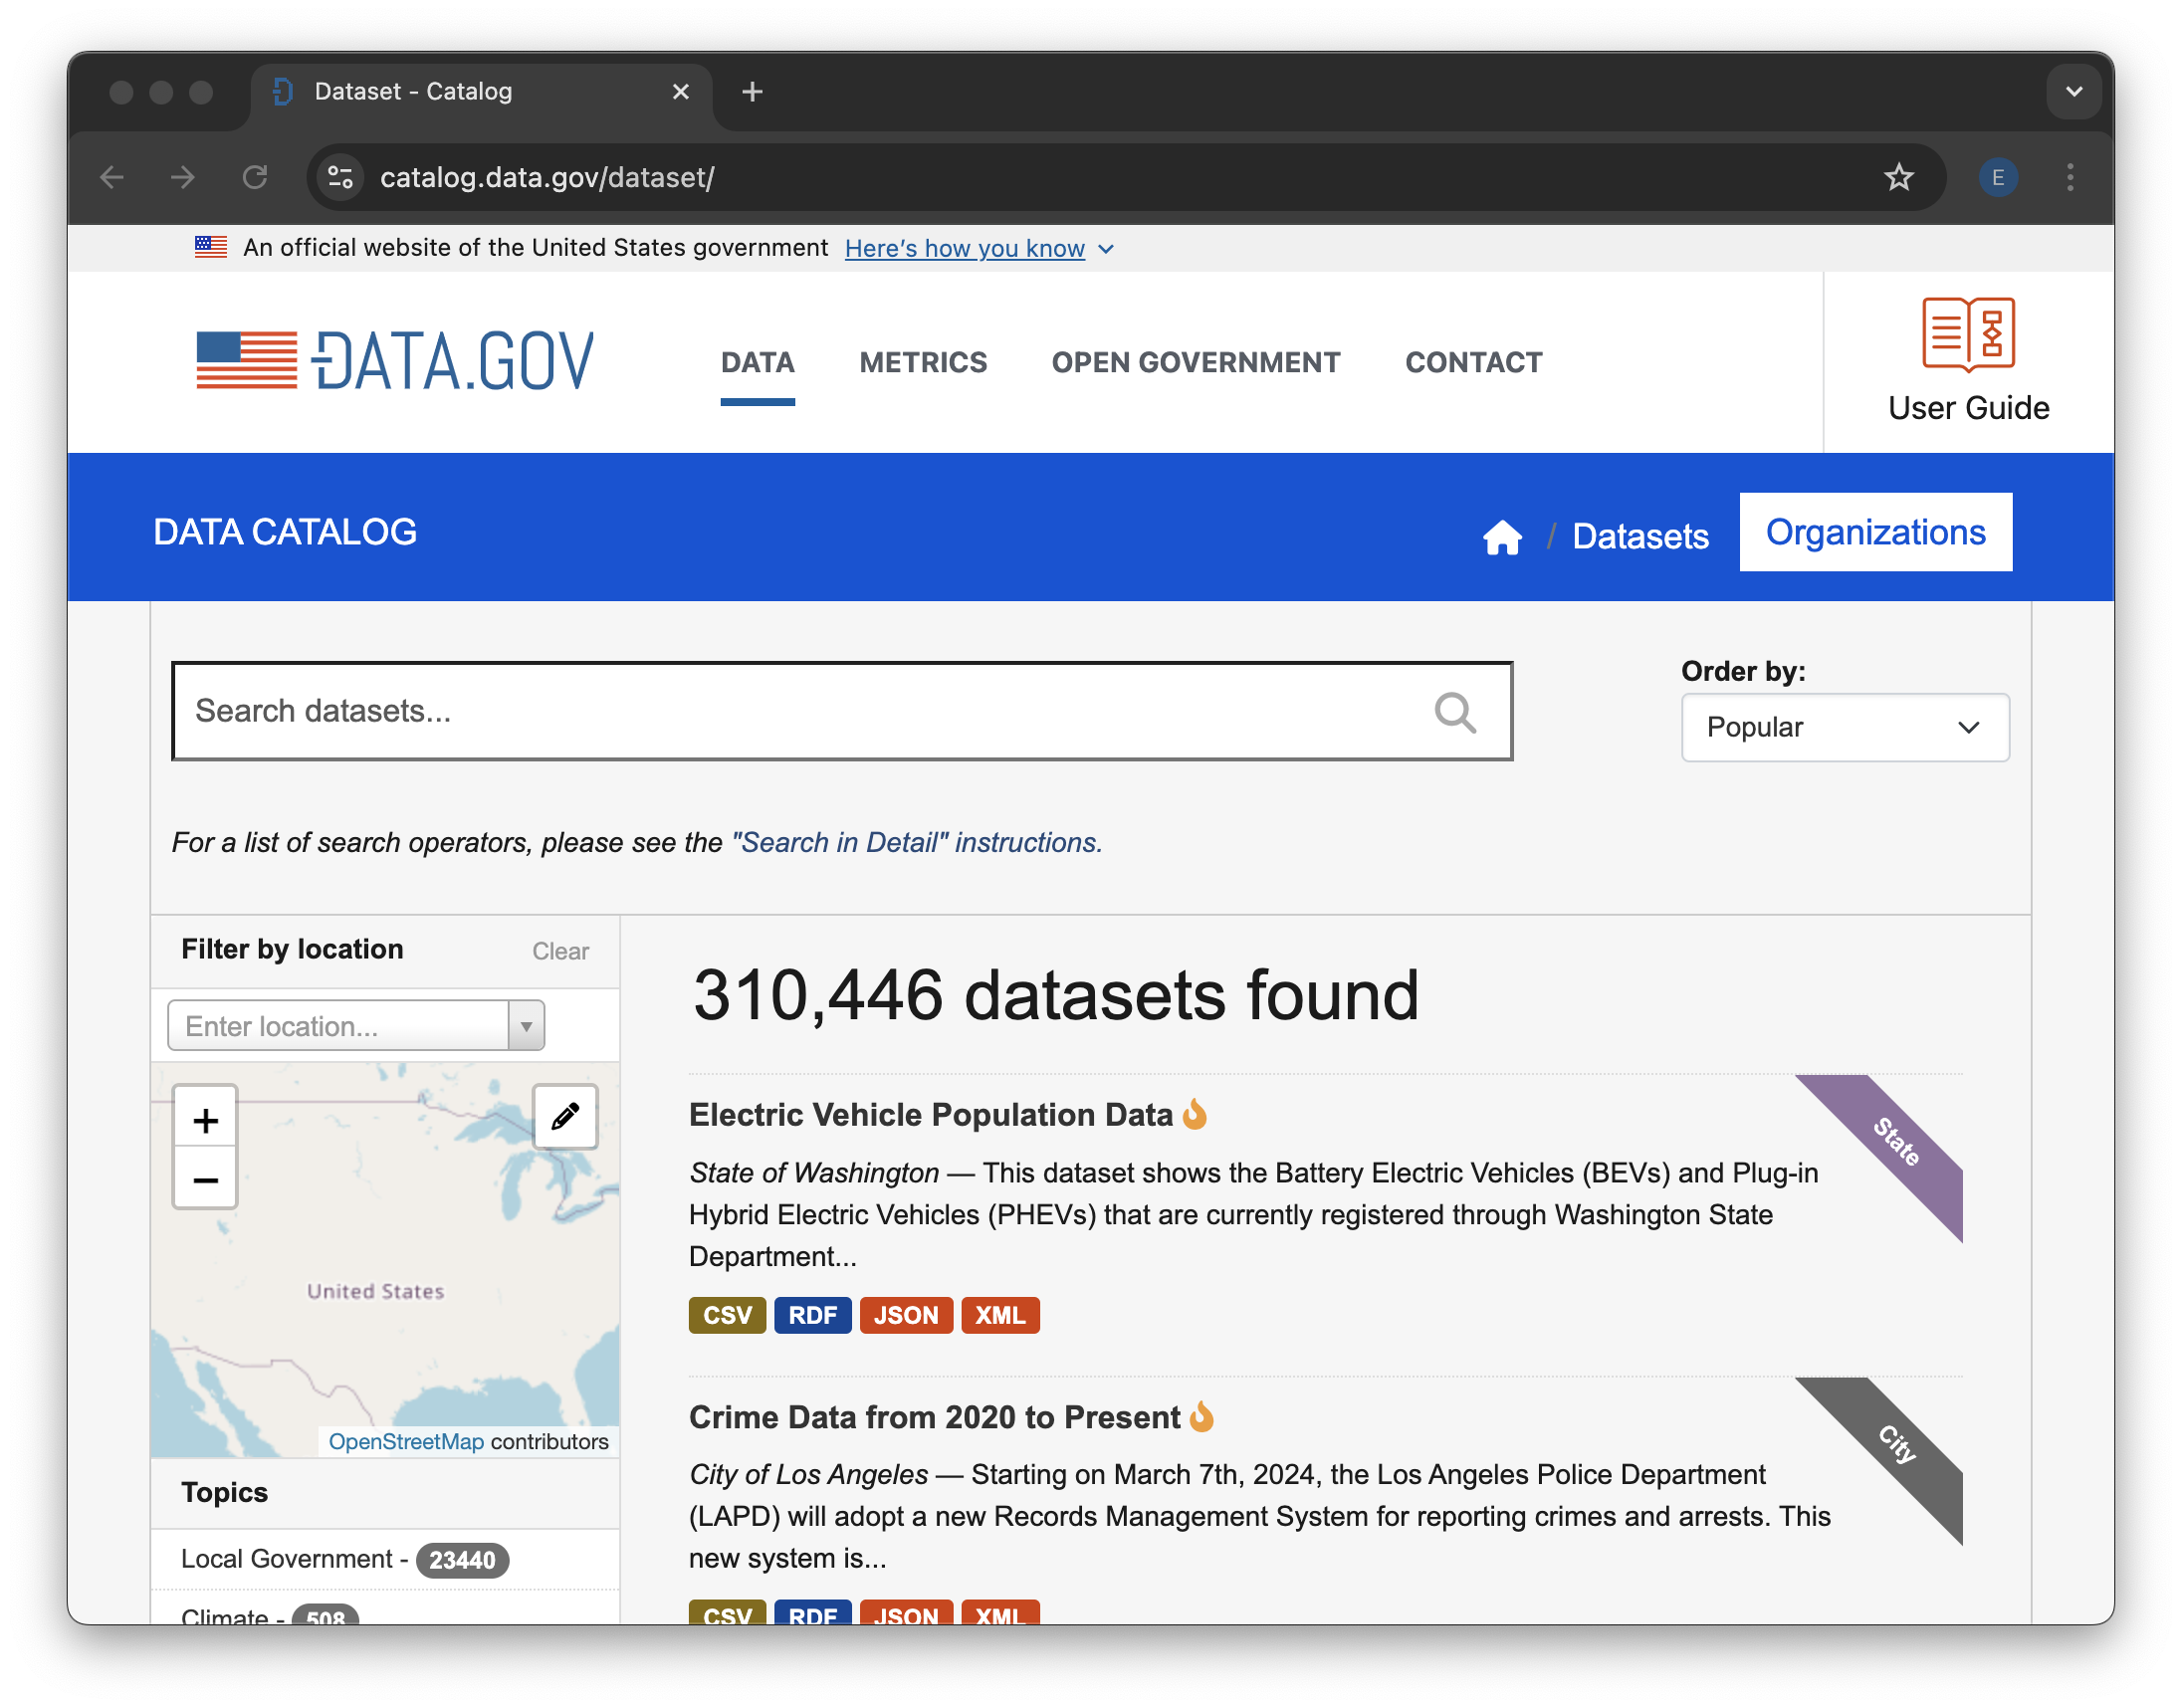
<figcaption aria-hidden="true">Open up the data.gov
catalog.</figcaption>
</figure>

## STEP 1B: Search

Search for the data you want. To get the American Indian Tribal
Subdivisions census data, we recommend the search term “American Indian
Tribal Subdivisions 2020”. These census files are updated regularly at
the time of the census, so we want to make sure we have the most recent
version. The last census was in 2020.

<figure>
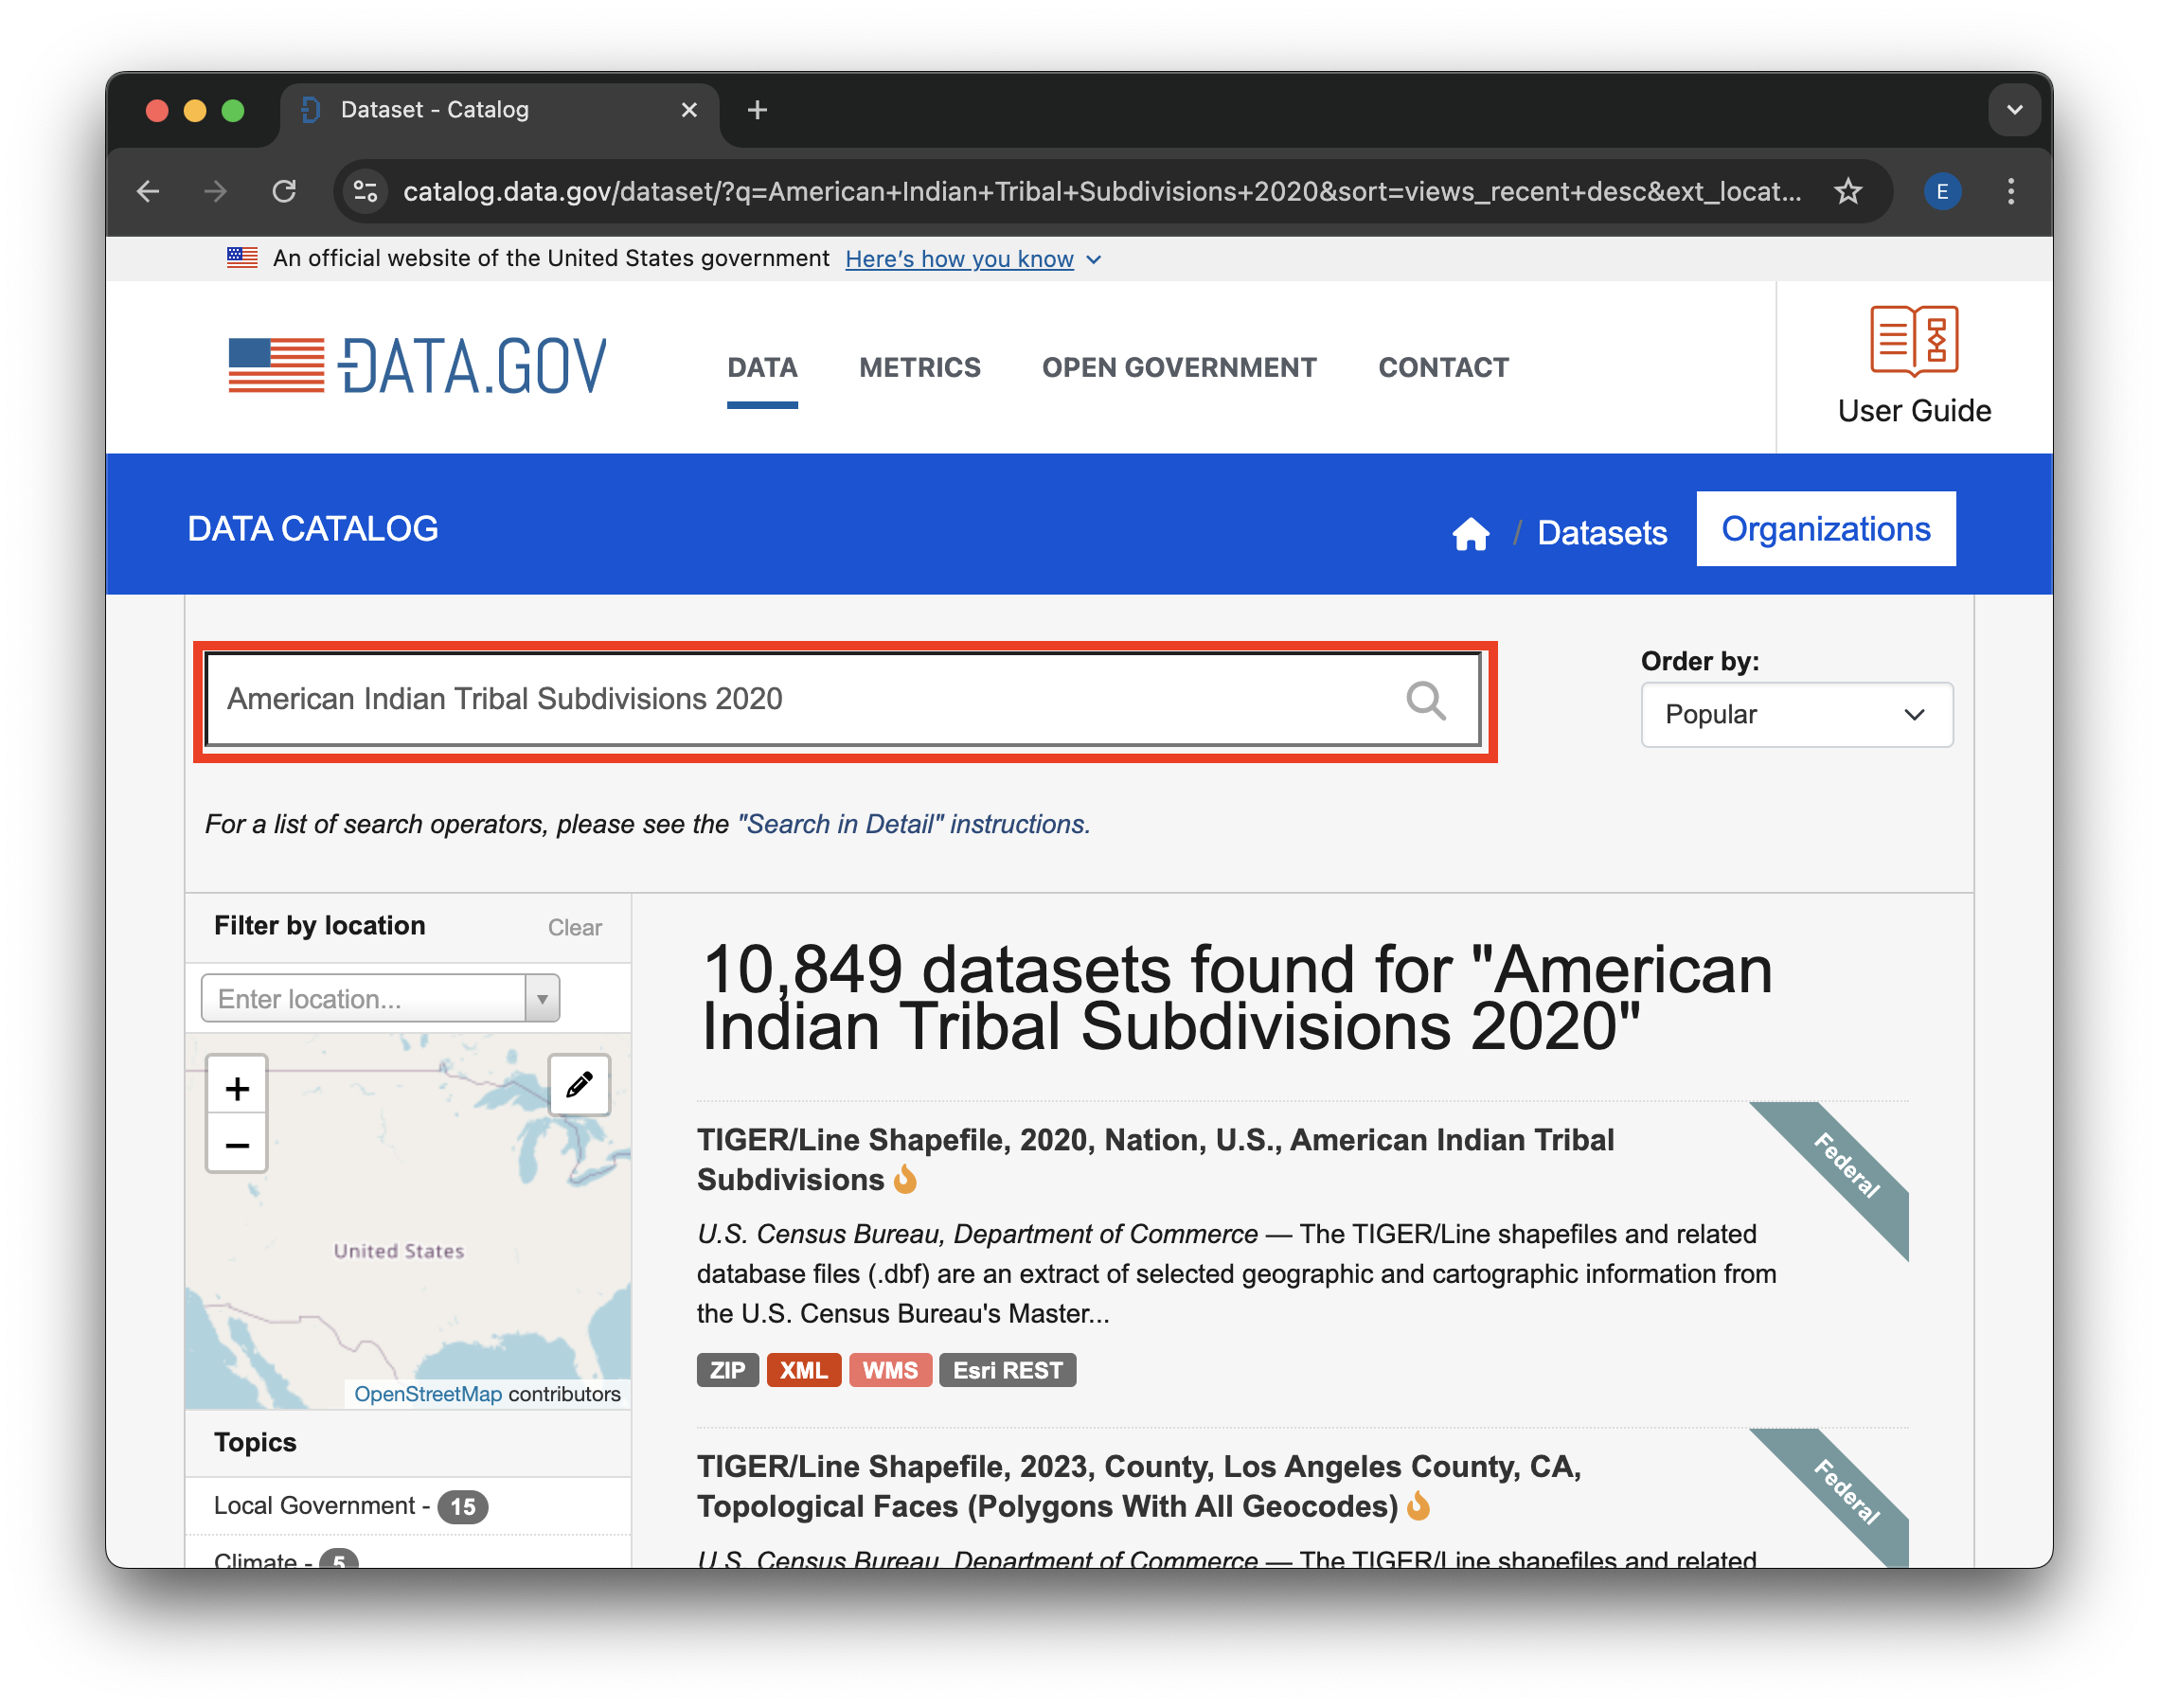
<figcaption aria-hidden="true"><strong>Search</strong> for “American
Indian Tribal Subdivisions 2020”</figcaption>
</figure>

## STEP 1C: Open the dataset page

Find the “TIGER/Line Shapefile, 2020, Nation, U.S., American Indian
Tribal Subdivisions” dataset in the search results, and click on the
title to go to the dataset page.

<figure>
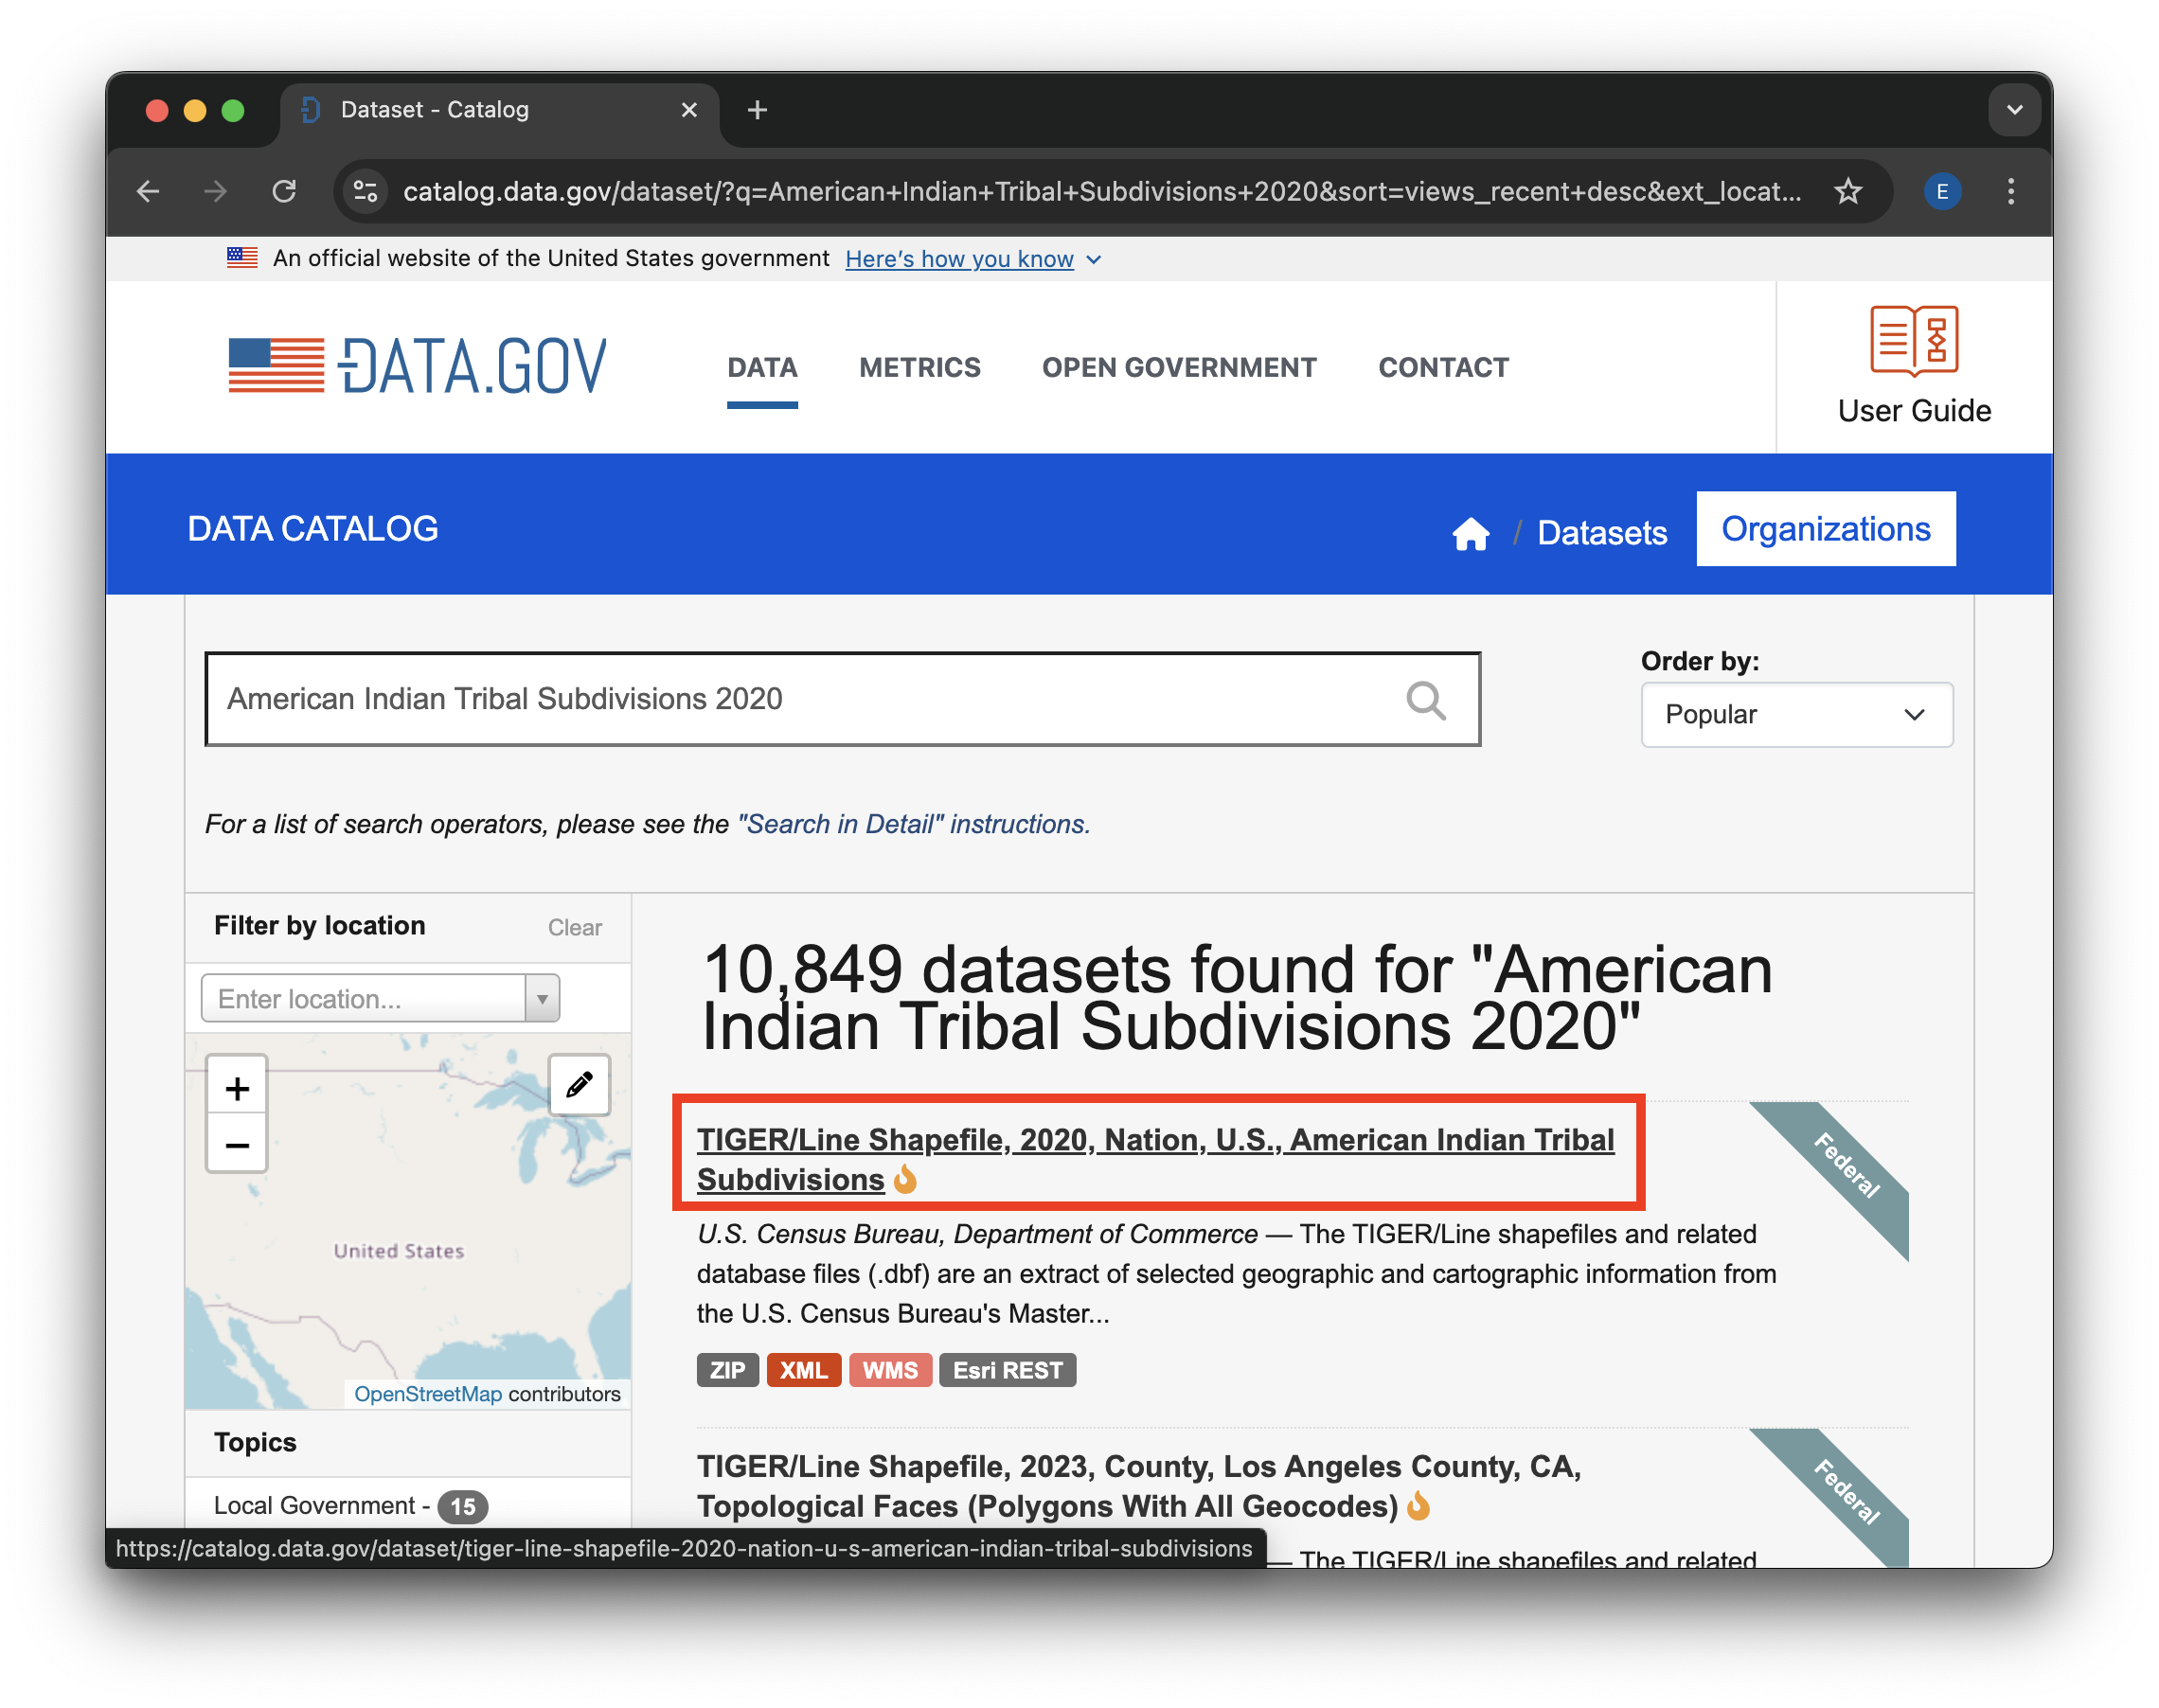
<figcaption aria-hidden="true">Select the “TIGER/Line Shapefile, 2020,
Nation, U.S., American Indian Tribal Subdivisions” dataset.</figcaption>
</figure>

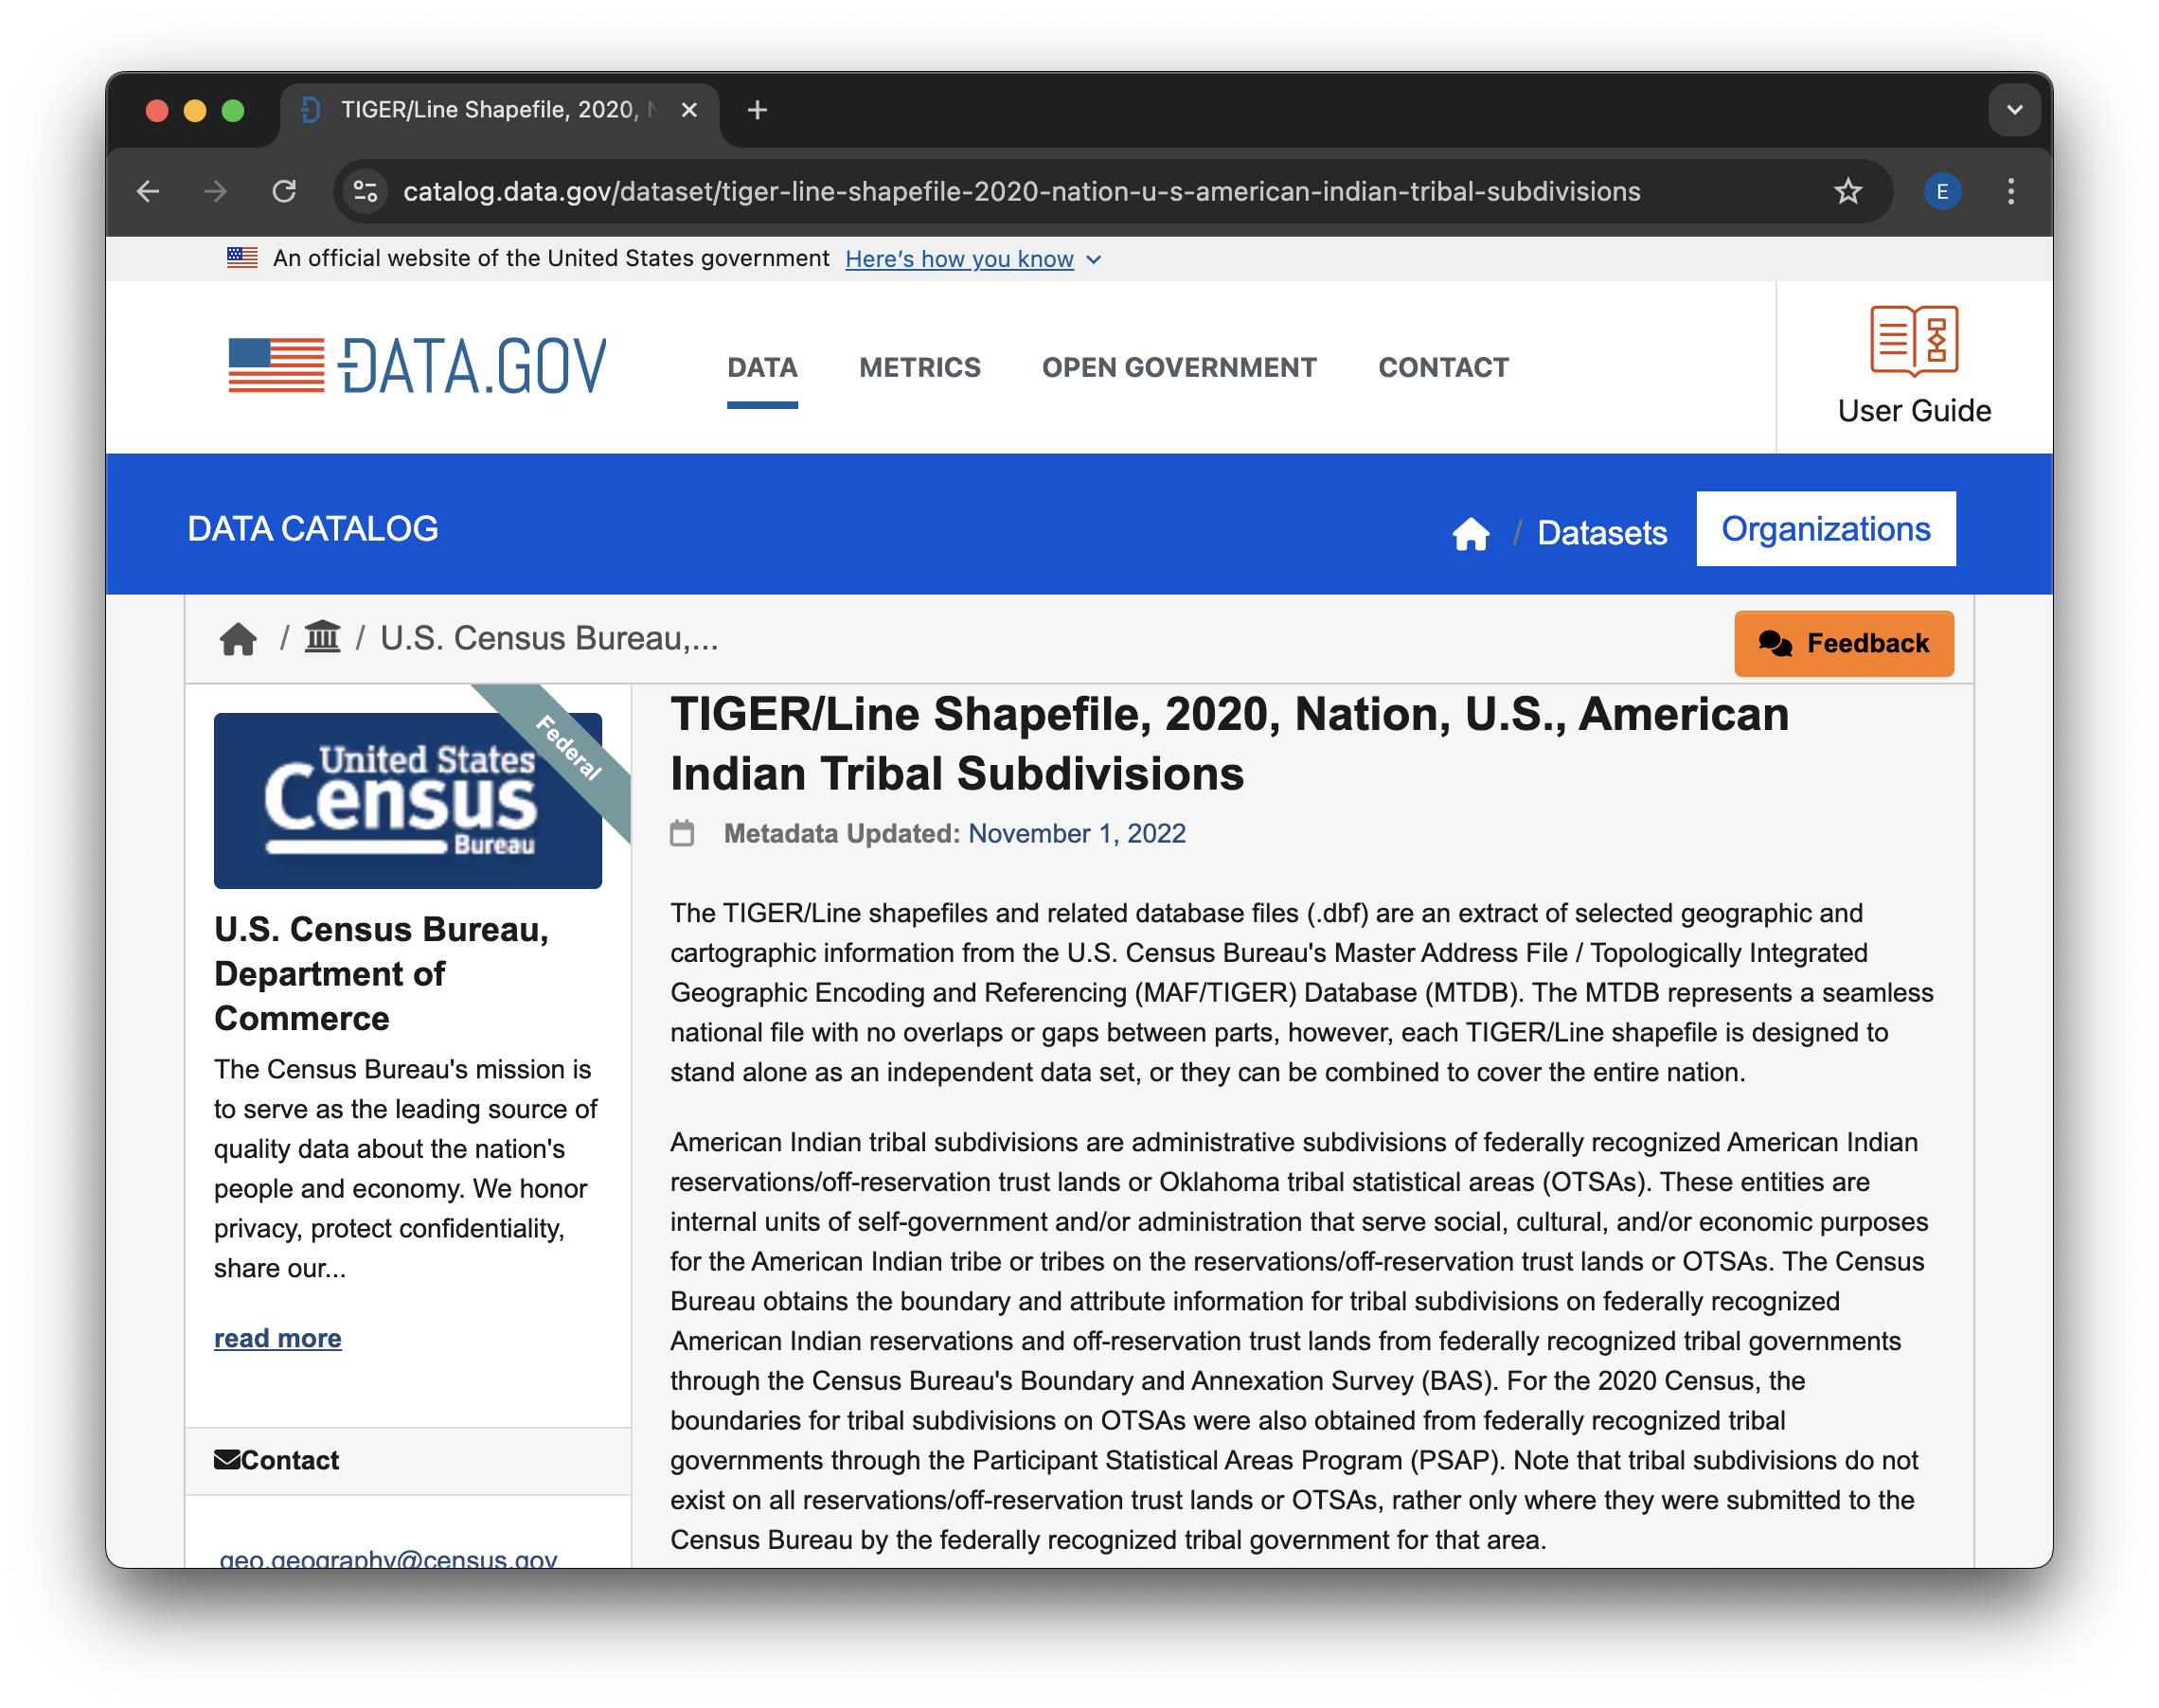
\## STEP 1D: Download

Next, scroll down to the available files to download. Click on the
`Download` button for the `.zip` file – this will be the easiest one to
open in Python.

<figure>
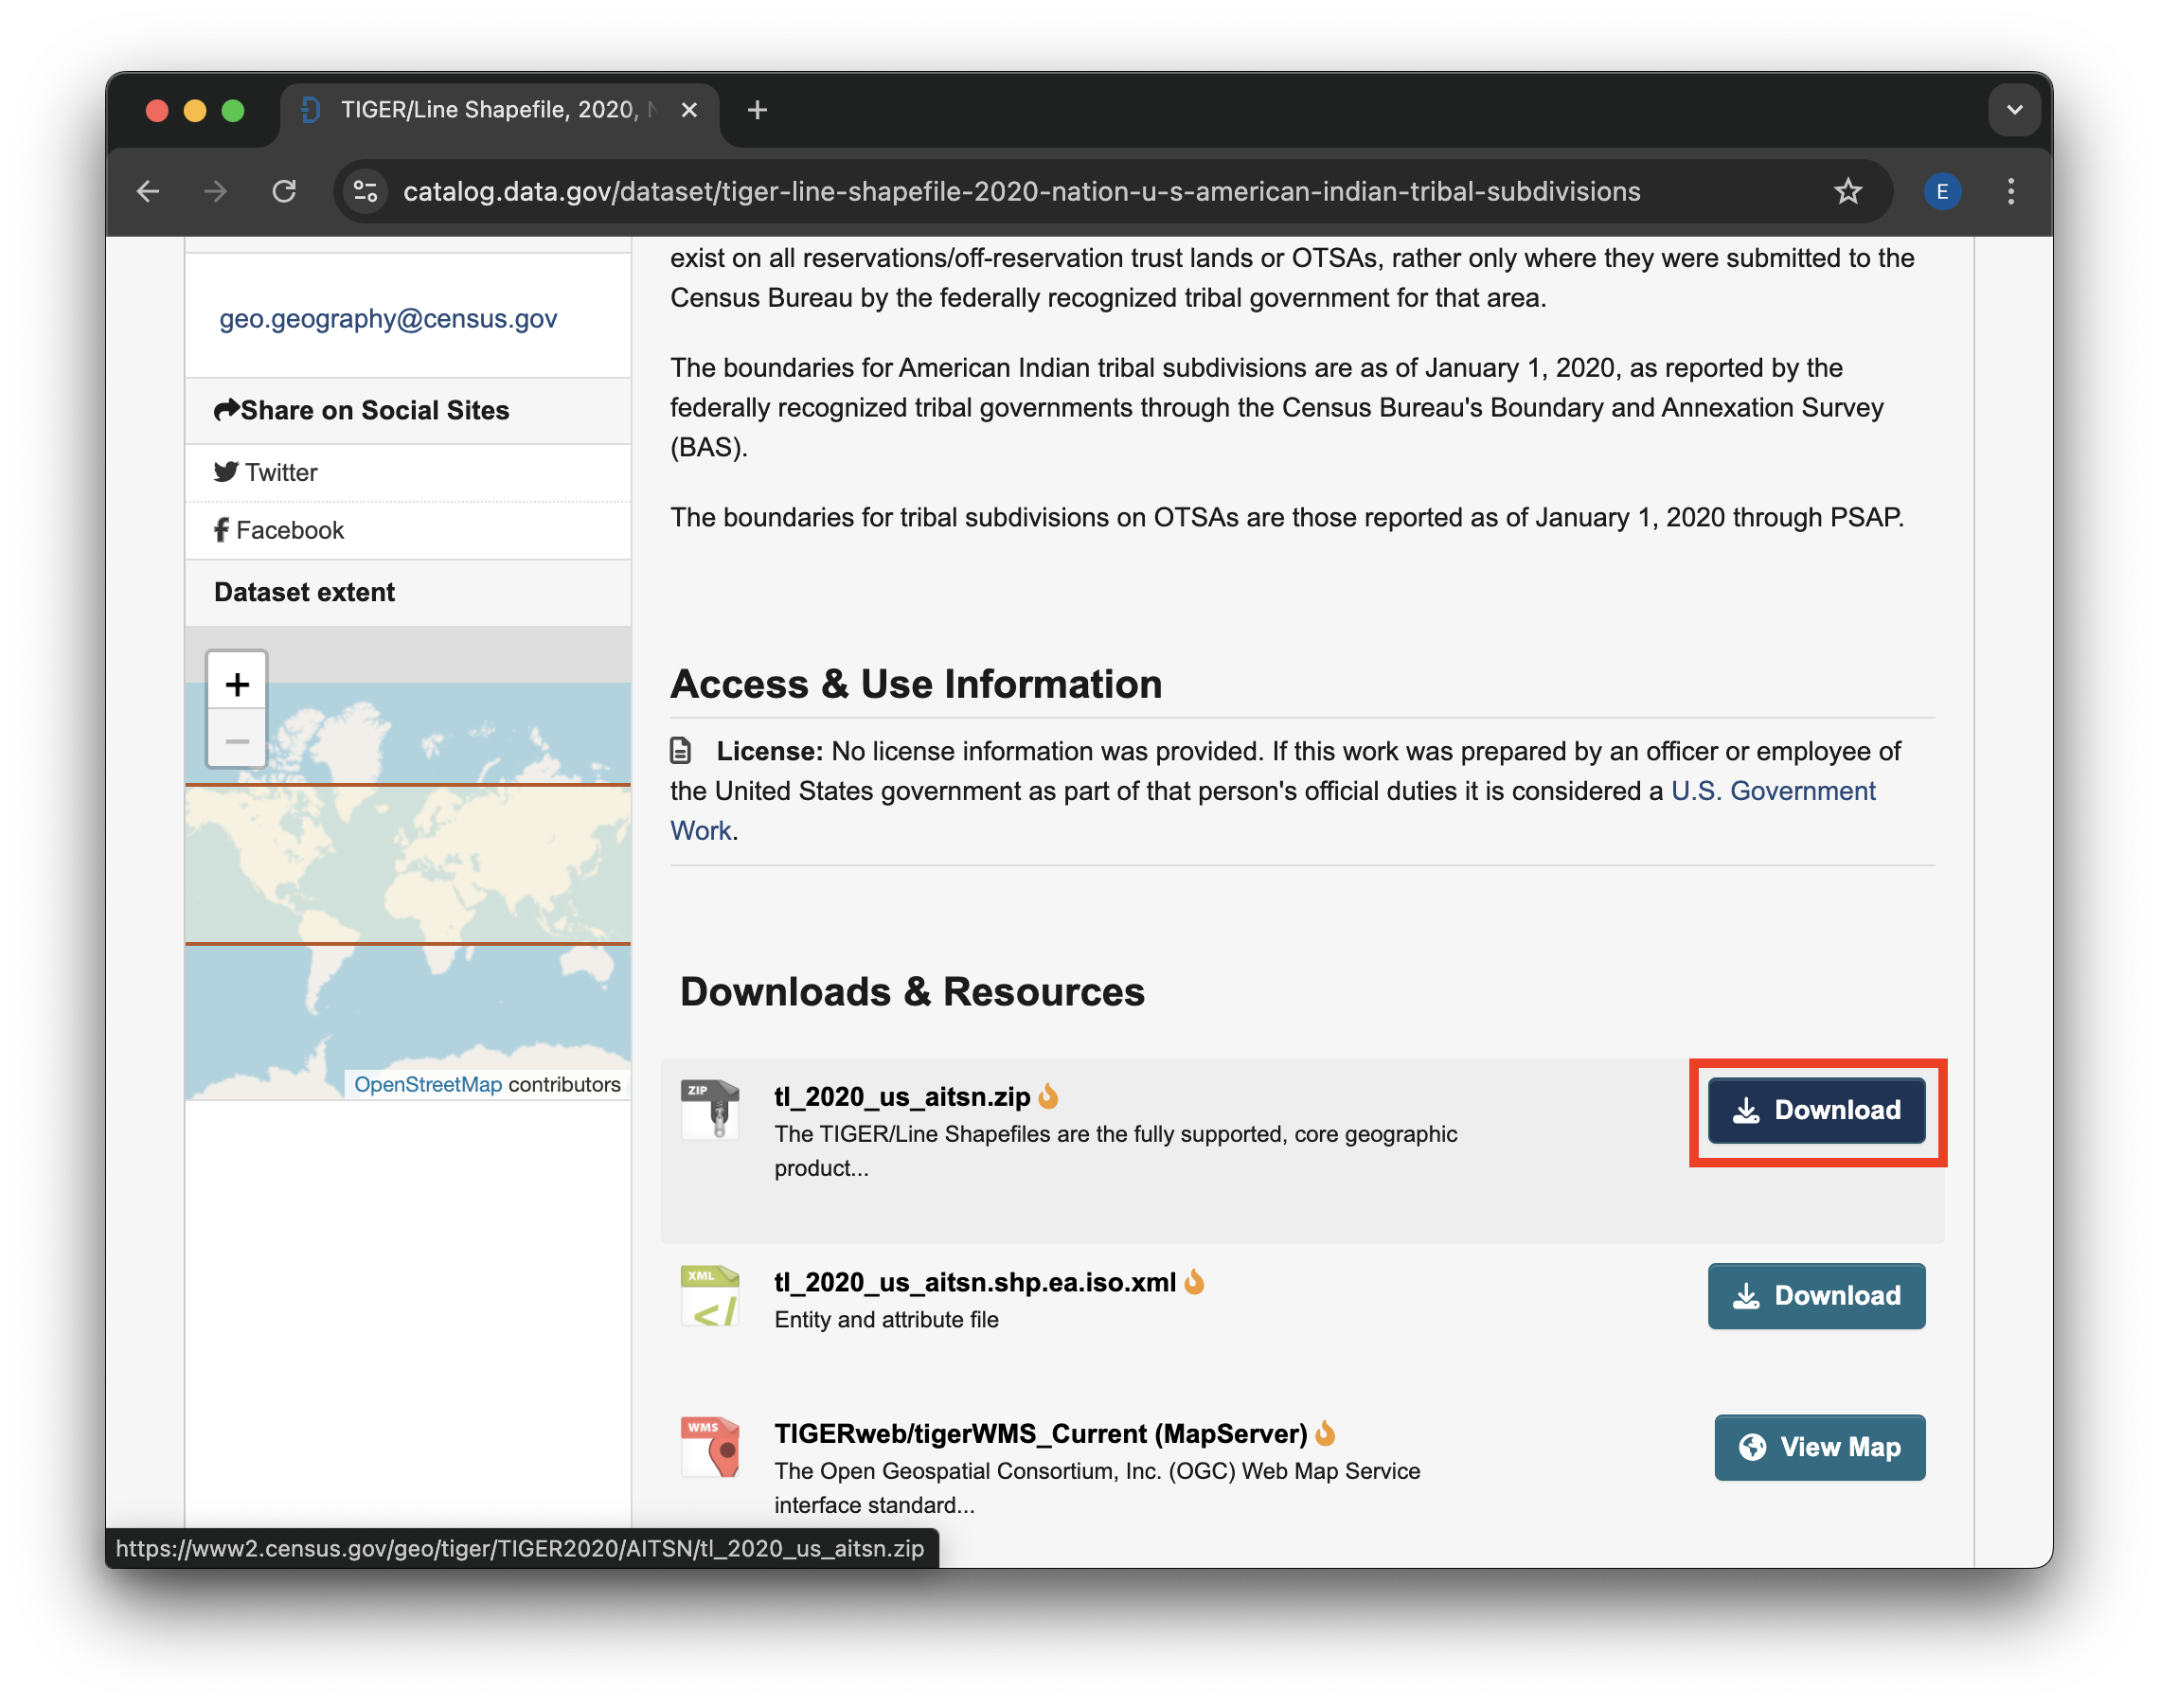
<figcaption aria-hidden="true">Scroll down and click on the
<code>.zip</code> file <code>Download</code> button.</figcaption>
</figure>

## STEP 1E: Move your file

We now need to locate the file you downloaded and put it somewhere where
Python can find it. Ideally, you should put the downloaded `.zip` file
in your project directory. Most web browsers will pop up with some kind
of button to open up your File Explorer (Windows) or Finder (Mac) in the
location of your downloaded files. You can also check in your user home
directory for a `Downloads` folder. If none of that works, try opening
up your File Explorer/Finder and searching for the file

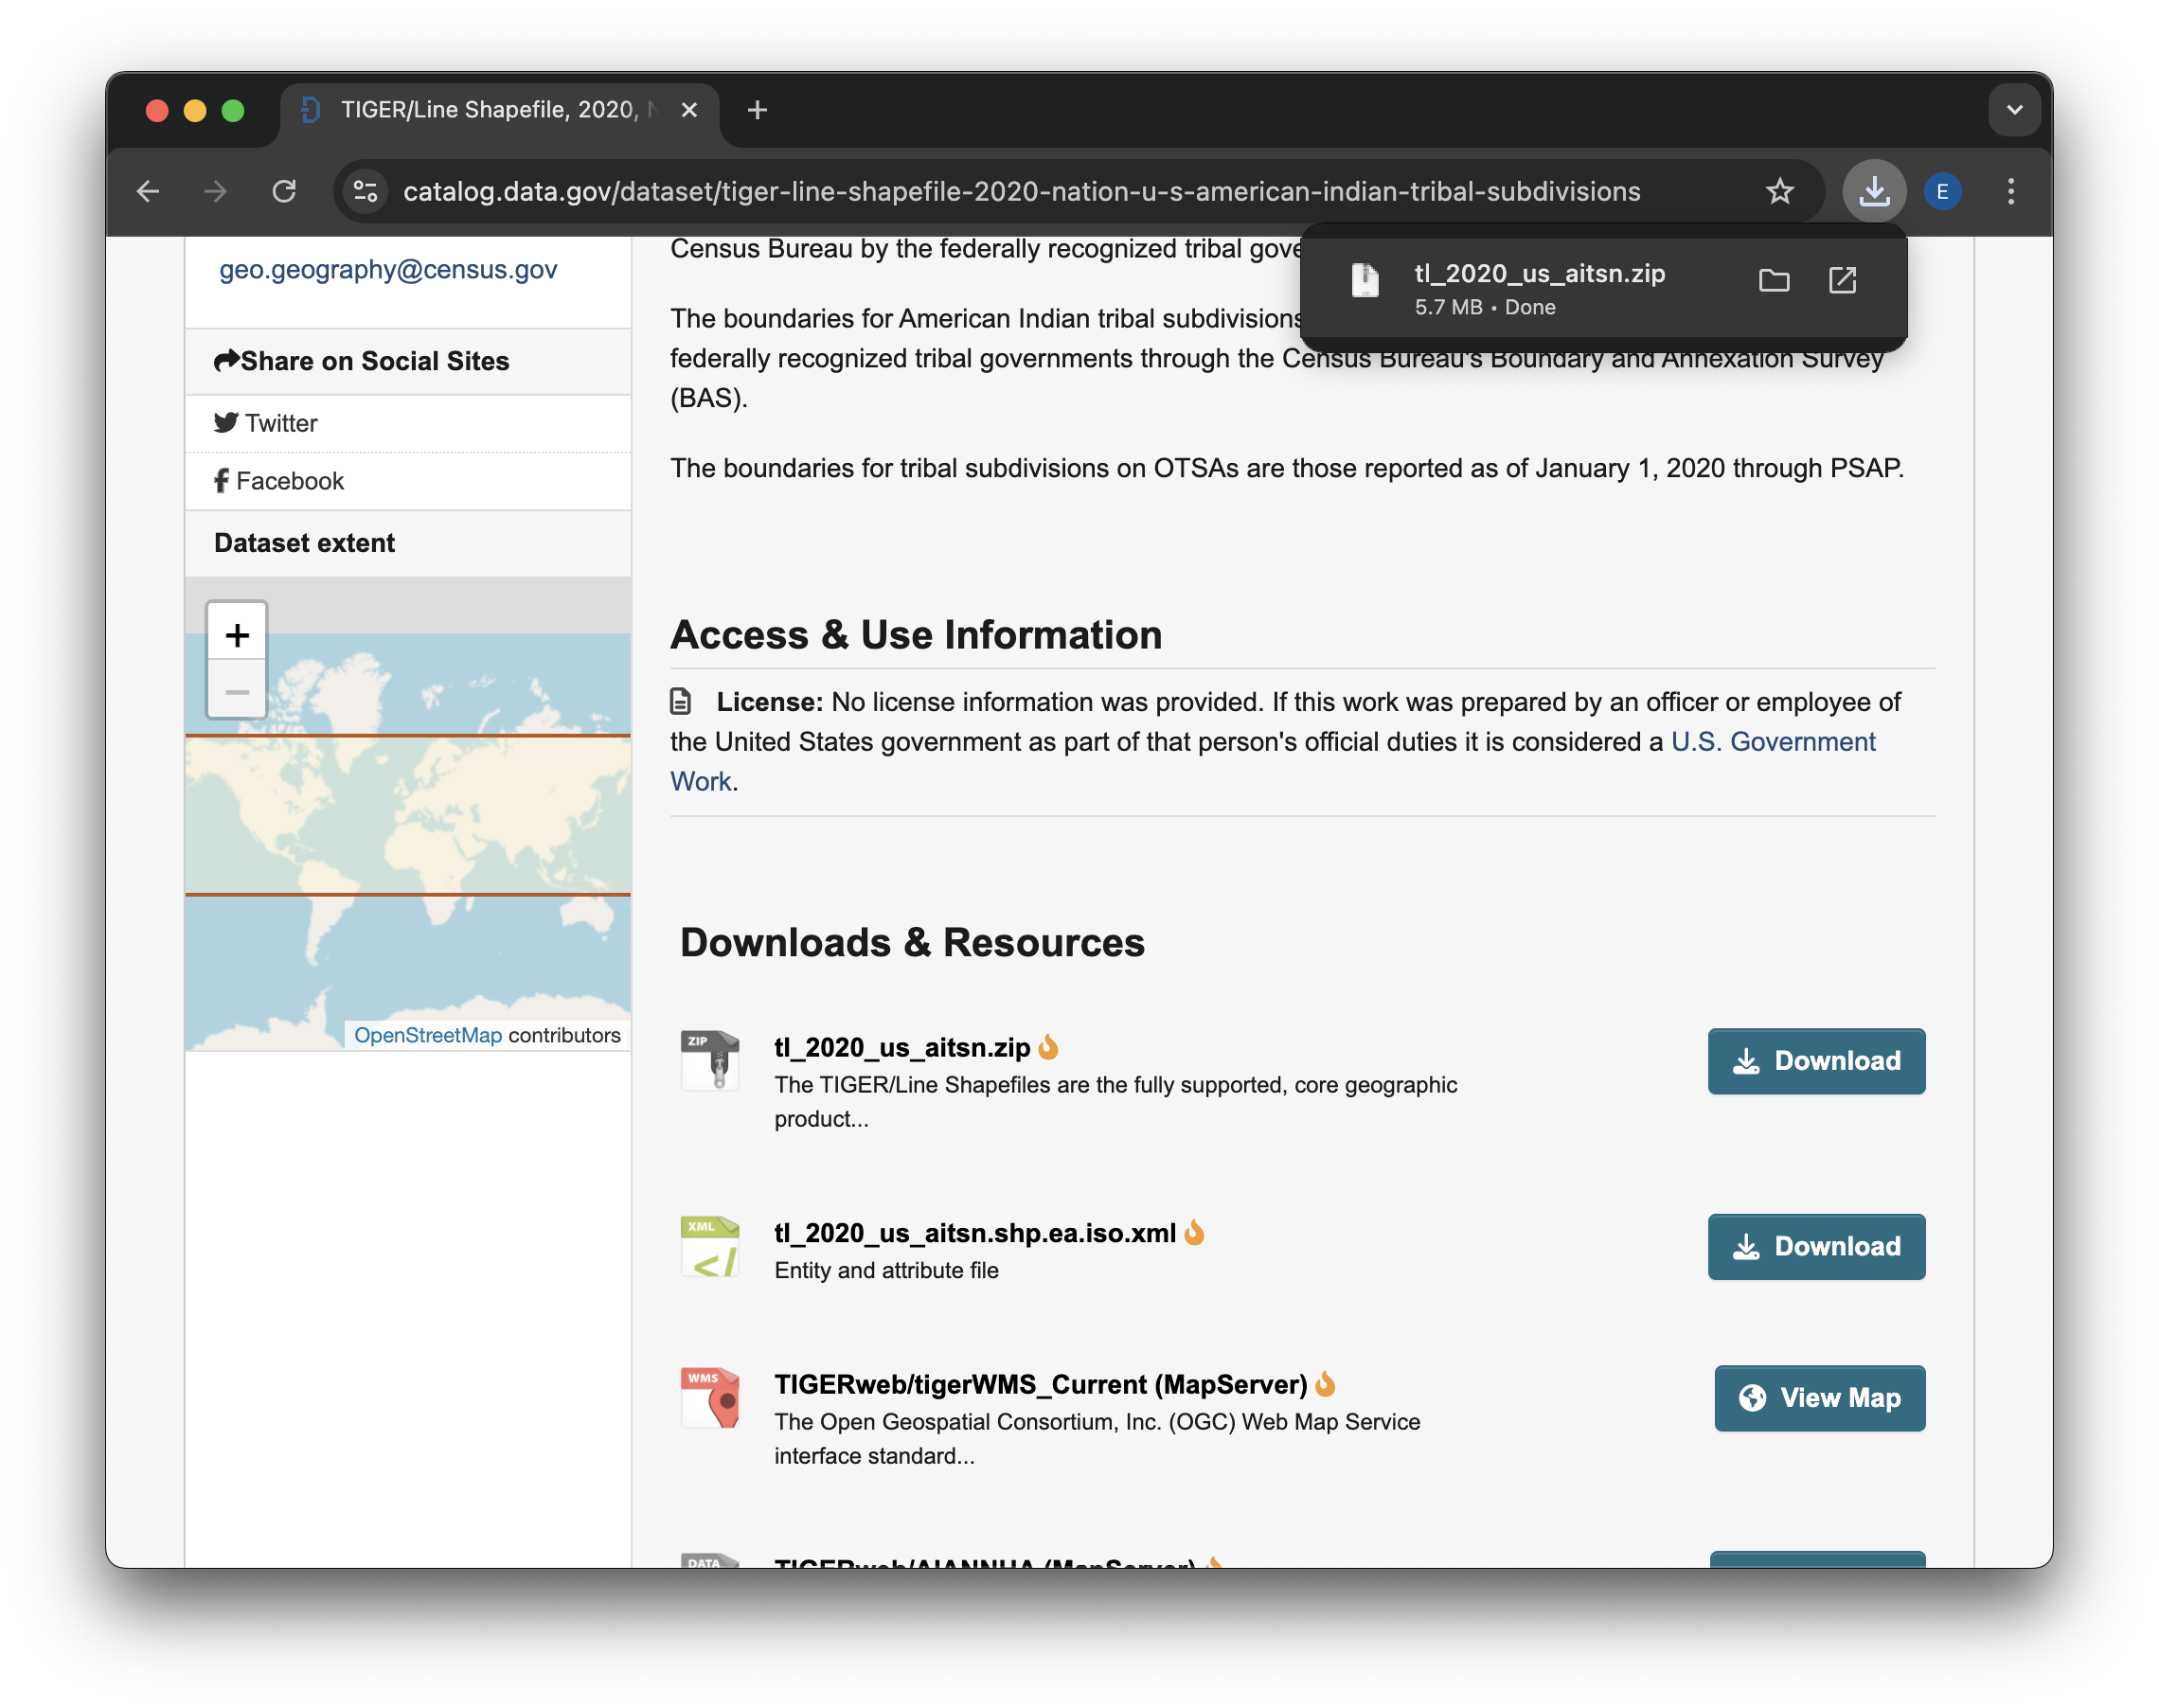
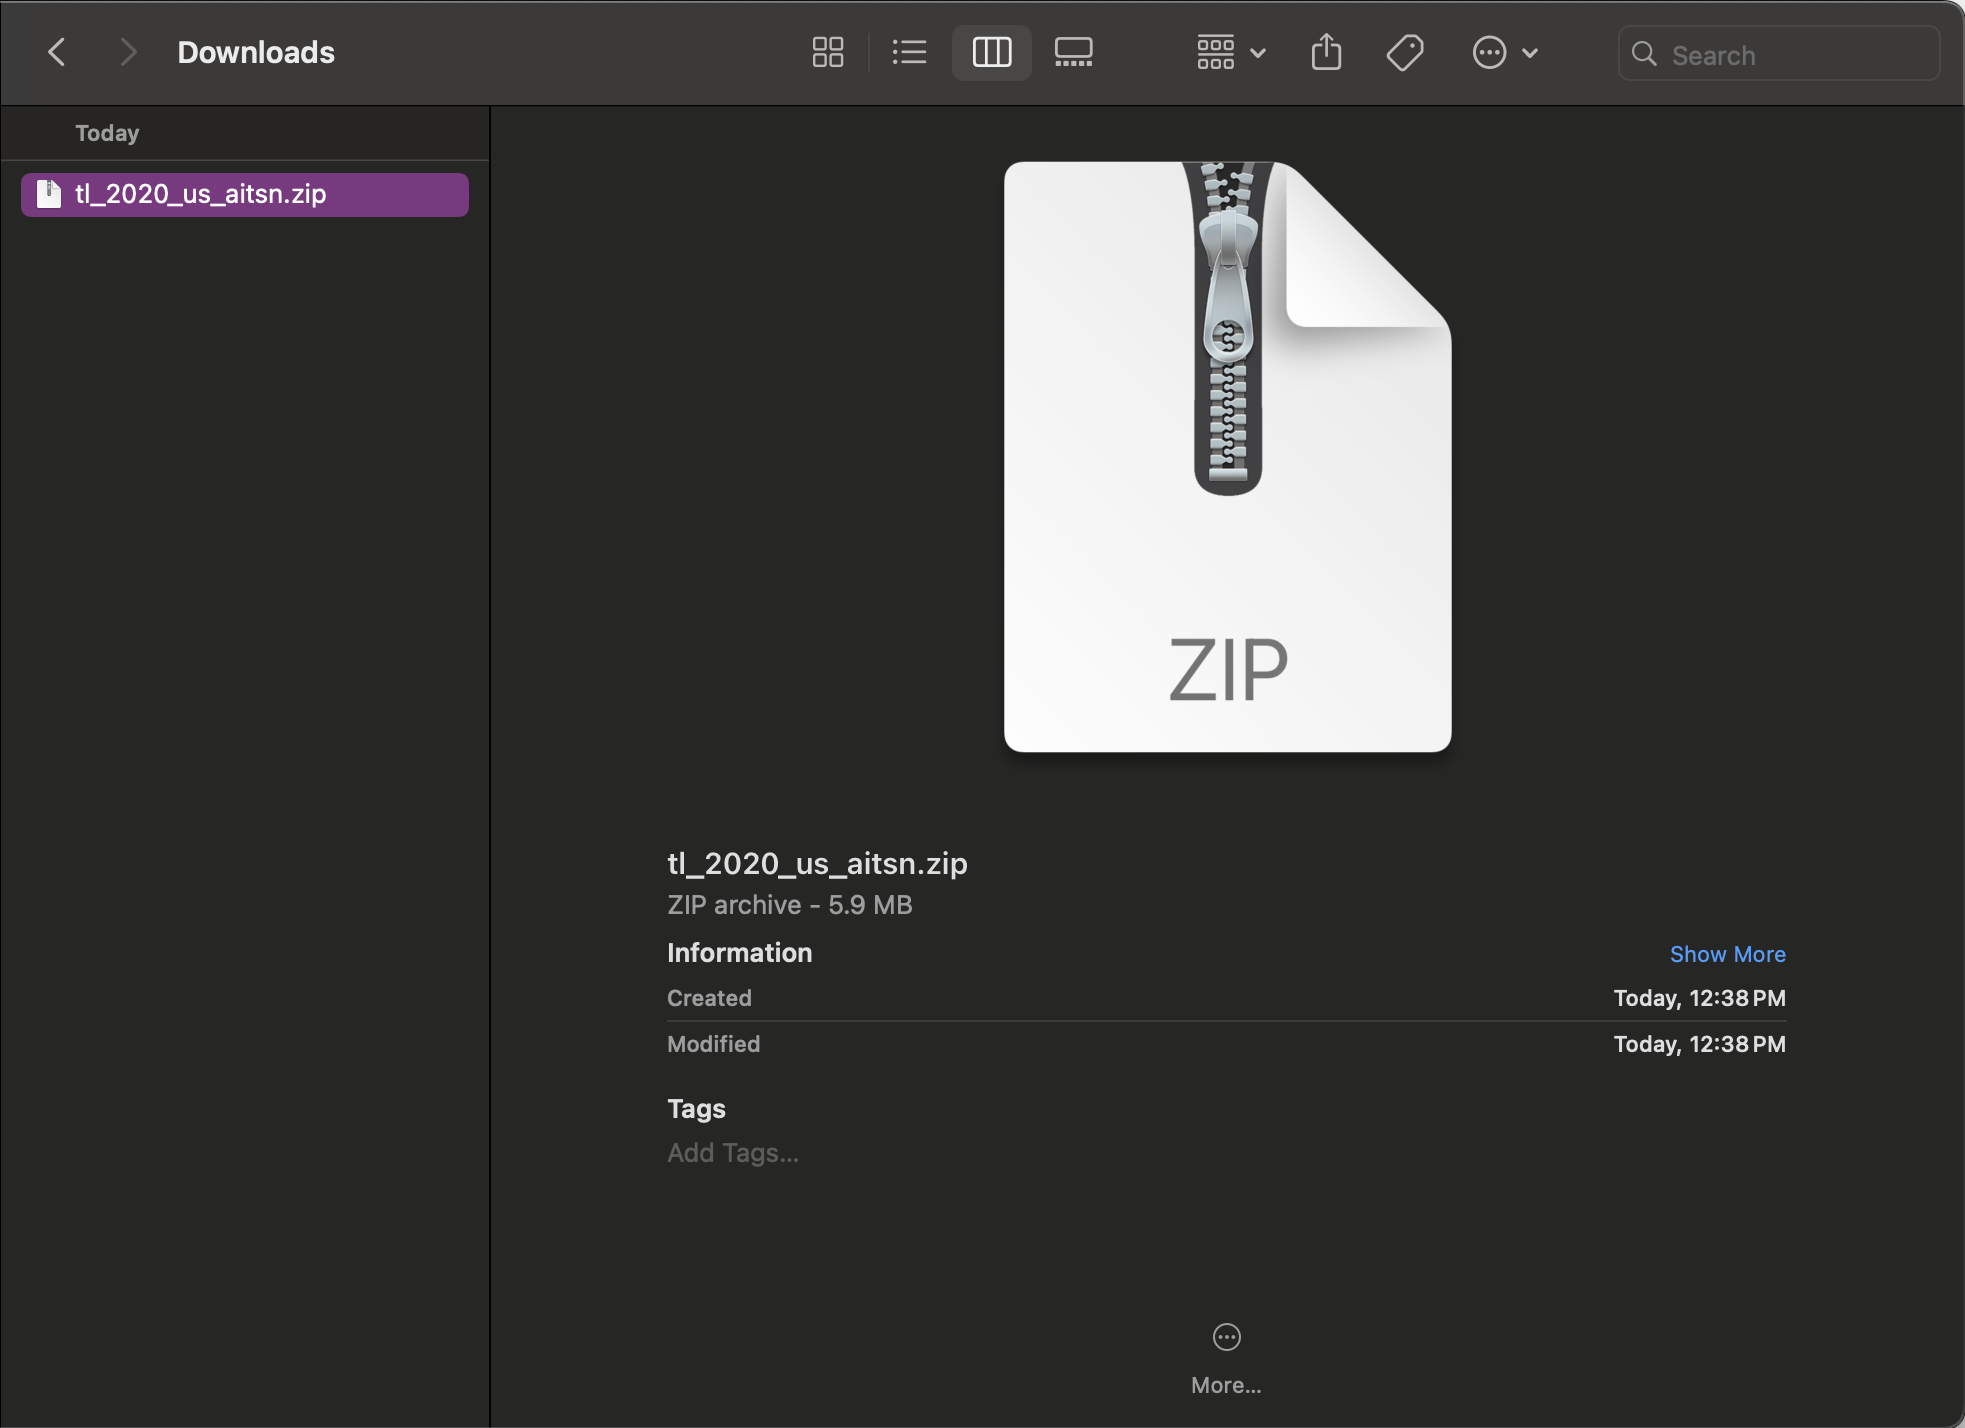

If you are working on GitHub Codespaces, you will need to upload your
file before relocating it:

1.  Go to the `Explorer` tab in your Codespace
2.  Right-click on the `data` folder
3.  Click `Upload`
4.  Select the `.zip` file you just downloaded.

<figure>
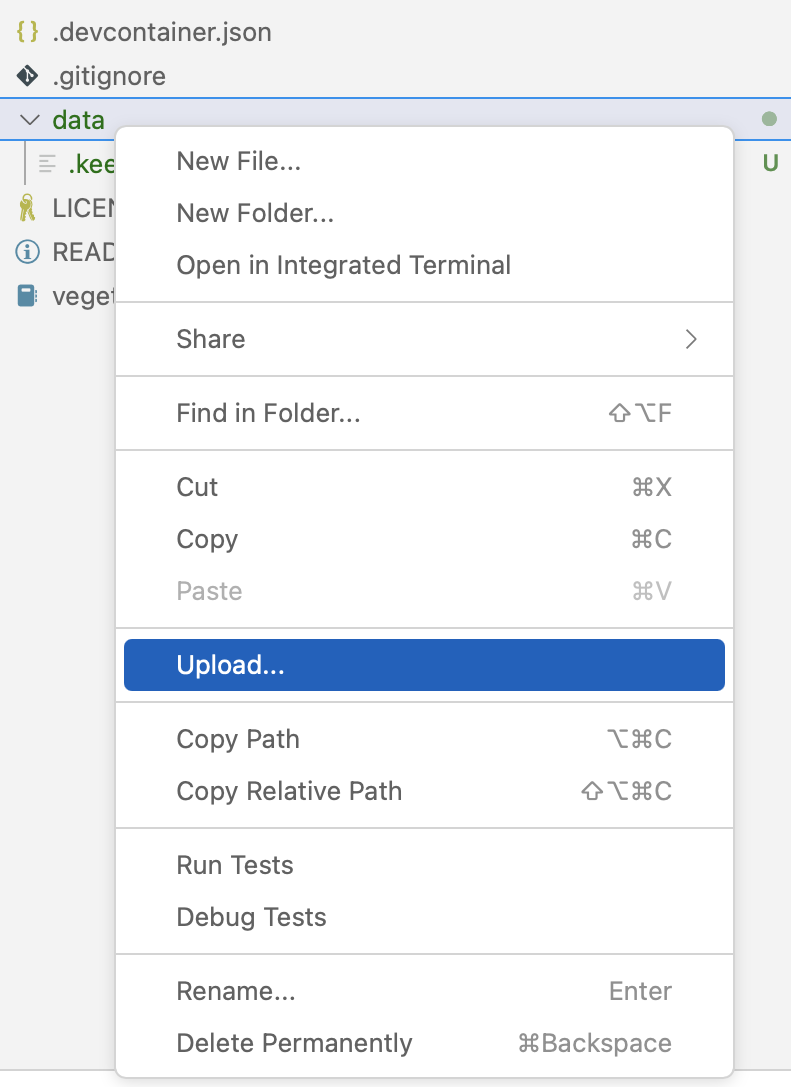
<figcaption aria-hidden="true">If you are using GitHub Codespaces,
upload the file.</figcaption>
</figure>

If you are working in GitHub Codespaces, you can skip ahead to unzipping
the file! If not, you’ll need to relocate your file on your computer.
One way to do that is with **bash**.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>The code cell below is using a language called <strong>bash</strong>,
which can be used to move files around your computer. To do that, we’re
using the <code>cp</code> command, which stands for
<strong>copy</strong>. In bash, you indicate that you want to retrieve a
variable with the <code>$</code> character. Since we’re in a Jupyter
notebook, we can also access Python variables this way!</p>
<ol type="1">
<li>Check that the path to your file,
<code>~/Downloads/tl_2020_us_aitsn.zip</code> is accurate, and change it
if it isn’t</li>
<li>Run the cell to move your file.</li>
</ol></div></div>

In [1]:
!cp ~/Downloads/tl_2020_us_aitsn.zip -d "$project.project_dir"

cp: cannot stat '/home/jovyan/Downloads/tl_2020_us_aitsn.zip': No such file or directory


Now, let’s check that the file got moved.

In [2]:
!ls "$project.project_dir"

ls: cannot access '.project_dir': No such file or directory


You can optionally unzip the file. `geopandas` will be able to read this
particular shapefile from a `.zip` archive, but some other files may
need to be unzipped. We’ll first define the path in Python, and then use
bash to unzip. You can also unzip with the `Python` `zipfile` library,
but it is more complicated than we need right now.

In [3]:
filename = "tl_2020_us_aitsn"
zip_path = project.project_dir / f"{filename}.zip"
unzip_dir = project.project_dir / filename

NameError: name 'project' is not defined

The following command unzips a zip archive to the specified directory
(`-d`). Any files that already exist are skipped without prompting
(`-n`)

In [ ]:
!unzip -n "$zip_path" -d "$unzip_dir"

You can also delete the zip file, now that it is extracted. This will
help keep your data directory tidy:

In [ ]:
!rm "$zip_path"

## STEP 1F: Open boundary in Python

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>"directory-name"</code> with the actual name of the
file you downloaded (or the folder you unzipped to) and put in your
project directory.</li>
<li>Modify the code below to use <strong>descriptive variable
names</strong>. Feel free to refer back to previous challenges for
similar code!</li>
<li>Add a line of code to open up the data path. What library and
function do you need to open this type of data?</li>
<li>Add some code to check your data, either by viewing it or making a
quick plot. Does it look like what you expected?</li>
</ol></div></div>

In [4]:
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


In [5]:
id = 'stars'
site_name = 'Gila River Indian Community'
event = 'water rights case'
data_dir = 'gila-river'

In [6]:
# Import python libraries
import geopandas as gpd
import hvplot.pandas

In [7]:
# Define boundary path
path = project.project_dir / "/workspaces/data/tl_2020_us_aitsn.zip"
print("the path to the data is", path)

# Open the site boundary
aitsn_boundary_dl = gpd.read_file(path)

# Check that the data were downloaded correctly
aitsn_boundary_dl

the path to the data is /workspaces/data/tl_2020_us_aitsn.zip


AIANNHCE TRSUBCE   TRSUBNS    GEOID                             NAME  \
0       2430     653  02419073  2430653                       Red Valley   
1       2430     665  02419077  2430665                       Rock Point   
2       2430     675  02419081  2430675                       Rough Rock   
3       2430     325  02418975  2430325                     Indian Wells   
4       2430     355  02418983  2430355                          Kayenta   
..       ...     ...       ...      ...                              ...   
479     1310     100  02418907  1310100                                1   
480     4290     550  02612186  4290550                Mission Highlands   
481     0855     400  02418941  0855400                    Fort Thompson   
482     0335     300  02784108  0335300                     Indian Point   
483     5560     120  02804808  5560120  Cheyenne and Arapaho District 2   

                            NAMELSAD LSAD CLASSFP  MTFCC FUNCSTAT       ALAND  \
0                 Red Valley Chapter   T2      D7  G2300        A   922036695   
1                 Rock Point Chapter   T2      D7  G2300        A   720360268   
2                 Rough Rock Chapter   T2      D7  G2300        A   364475668   
3               Indian Wells Chapter   T2      D7  G2300        A   717835323   
4                    Kayenta Chapter   T2      D7  G2300        A  1419241065   
..                               ...  ...     ...    ...      ...         ...   
479                       District 1   28      D7  G2300        N   139902197   
480                Mission Highlands   00      D7  G2300        N     6188043   
481           Fort Thompson District   07      D7  G2300        N   535432708   
482             Indian Point Segment   T3      D7  G2300        N      326985   
483  Cheyenne and Arapaho District 2   00      D7  G2300        S  4709525489   

       AWATER     INTPTLAT      INTPTLON  \
0      195247  +36.6294607  -109.0550394   
1       88806  +36.6598701  -109.6166836   
2      216144  +36.3976971  -109.7695183   
3      133795  +35.3248534  -110.0855000   
4     1982848  +36.6884391  -110.3045616   
..        ...          ...           ...   
479         0  +33.0600842  -111.5806313   
480         0  +48.0754384  -122.2507432   
481  38653364  +44.1559680  -099.4467700   
482         0  +48.0604594  -092.8466753   
483  36177523  +35.7613633  -098.0107463   

                                              geometry  
0    POLYGON ((-109.2827 36.64644, -109.28181 36.65...  
1    POLYGON ((-109.85922 36.49859, -109.85521 36.5...  
2    POLYGON ((-109.93053 36.40672, -109.92923 36.4...  
3    POLYGON ((-110.24222 35.36327, -110.24215 35.3...  
4    POLYGON ((-110.56817 36.73489, -110.56603 36.7...  
..                                                 ...  
479  POLYGON ((-111.63622 33.11798, -111.63405 33.1...  
480  POLYGON ((-122.27579 48.07128, -122.27578 48.0...  
481  POLYGON ((-99.66452 44.25269, -99.66449 44.255...  
482  POLYGON ((-92.85187 48.05944, -92.85186 48.059...  
483  POLYGON ((-98.61081 35.72524, -98.60732 35.725...  

[484 rows x 15 columns]

Let’s go ahead and select the Gila River subdivisions, and make a site
map.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>identifier</code> with the value you found from
exploring the interactive map. Make sure that you are using the correct
<strong>data type</strong>!</li>
<li>Change the plot to have a web tile basemap, and look the way you
want it to.</li>
</ol></div></div>

In [8]:
# Select and merge the subdivisions you want
gric_gdf_dl = aitsn_boundary_dl.loc[aitsn_boundary_dl.AIANNHCE=='1310'].dissolve()
# Plot the results with web tile images
gric_gdf_dl.hvplot(
    geo=True, tiles='EsriImagery',
    fill_color=None, line_color='black',
    title=site_name,
    frame_width=500)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [9]:
%store gric_gdf_dl 

Stored 'gric_gdf_dl' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!